# Data PreProcessing

### Importing the libraries

In [3]:
# import the library : 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


### Importing the dataset

In [32]:
dataset = pd.read_csv("Data.csv")
X = dataset.iloc[: ,:-1].values # transforme to numpy.ndarry
y = dataset.iloc[:,-1].values



### Taking care of missing data

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64
   Country   Age   Salary Purchased
4  Germany  40.0      NaN       Yes
6    Spain   NaN  52000.0        No


<Axes: >

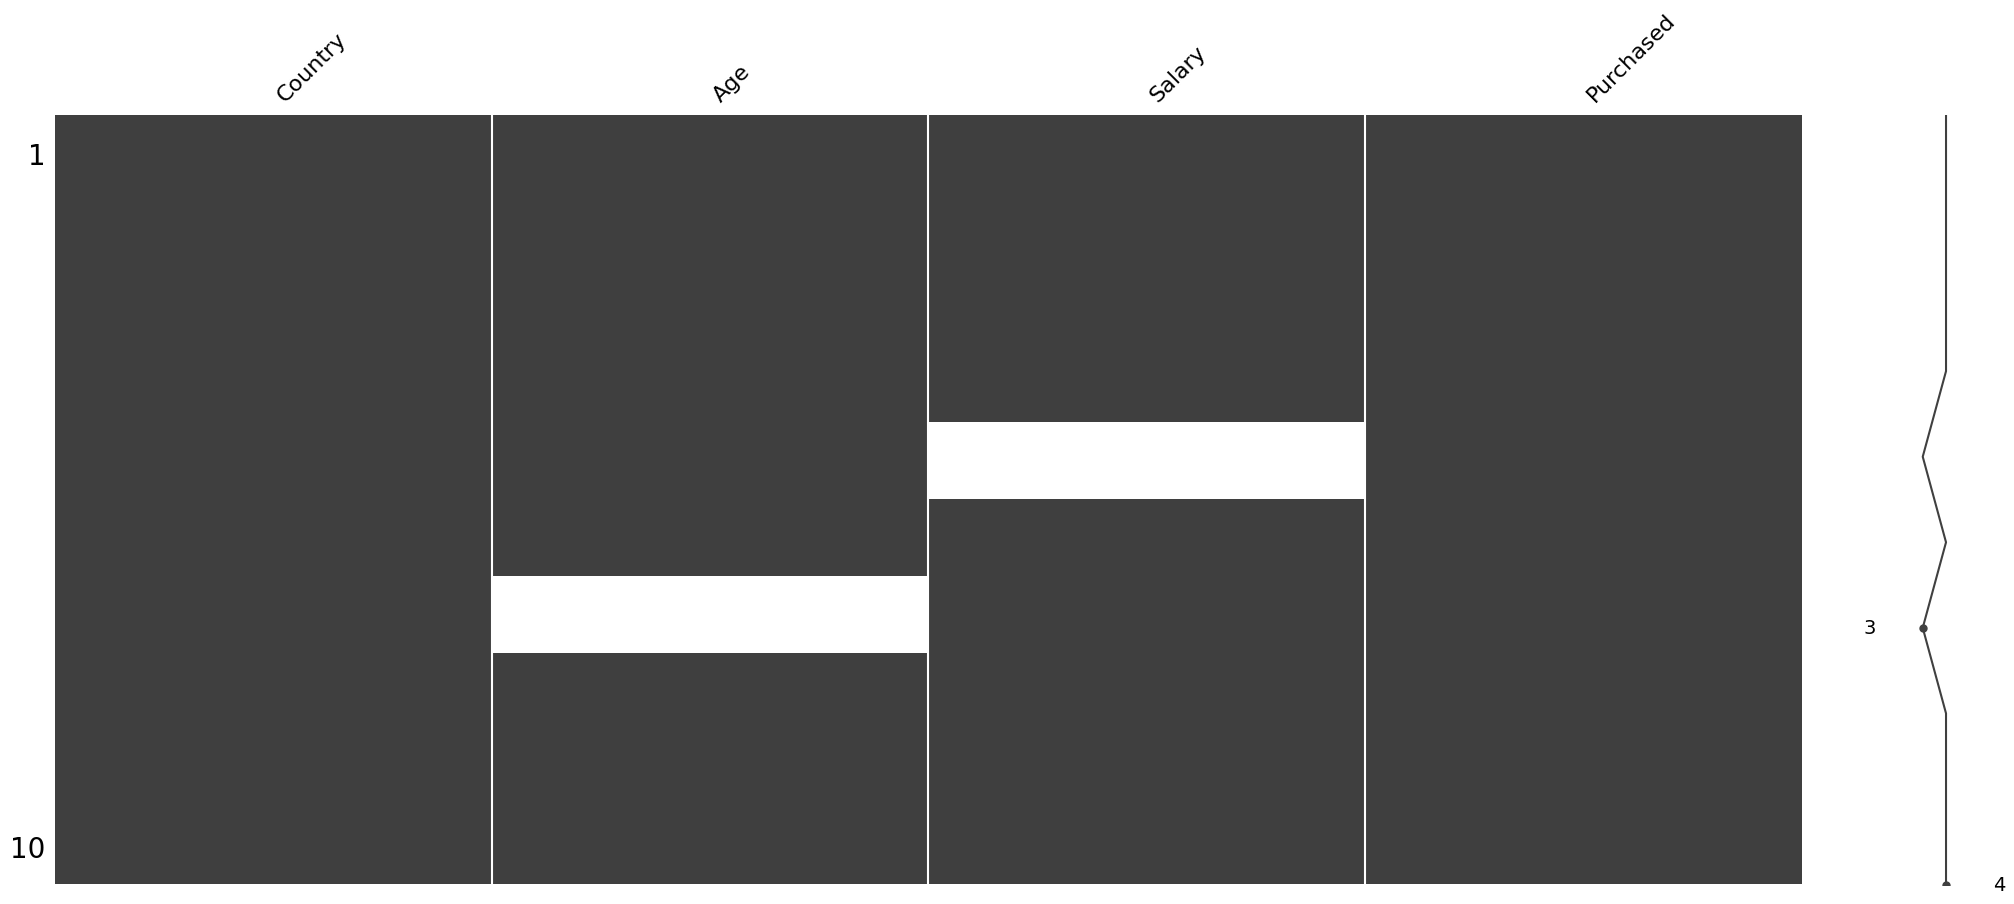

In [33]:
# isnull && sum 
missing_data = dataset.isnull()
print(missing_data.sum())

# Afficher les lignes où au moins une valeur est manquante
rows_with_missing_data = dataset[dataset.isnull().any(axis=1)]
print(rows_with_missing_data)

# Visualiser les valeurs manquantes
import missingno as msno
msno.matrix(dataset)

In [23]:
# replace the missing data by the average of colum : 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Encoding categorical data

#### Encoding the Independent Variable

In [37]:
# france <- vect(1,0,0)
# Germany  <- vect(0,1,0)
# spain <- vect(0,0,1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder" ,OneHotEncoder() , [0] )] , remainder="passthrough")
X = np.array(ct.fit_transform(X))
print(X)



[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 nan]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 nan 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


#### Encoding the Dependent Variable

In [38]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]
